In [48]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time (numeric continuous values) to sell for two different groups (categories)
- One sample or two sample? 
- One tailed or two tailed?

Form a hypothesis:

$H_0$ = There is no difference in average time to sell at two offices   
$H_a$ = There is difference in average time to sell at two offices

Significance level $\alpha$ = 0.05

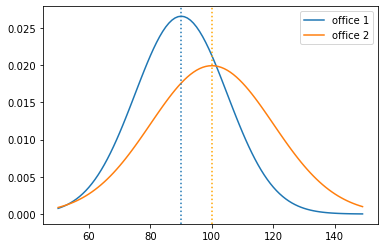

In [2]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html



In [82]:
#Using Scipy 
α = 0.05

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [83]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis


### 2. Load the mpg dataset and use it to answer the following questions:

a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  
b. Are compact cars more fuel-efficient than the average car?  
c. Do manual cars get better gas mileage than automatic cars?

In [65]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


#### 1.  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)


$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999  
$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving


- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [66]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [68]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

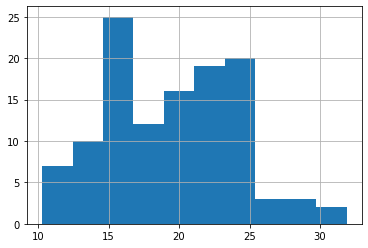

In [69]:
# plot distribution for fe_2008
fe_2008.hist()

<AxesSubplot:>

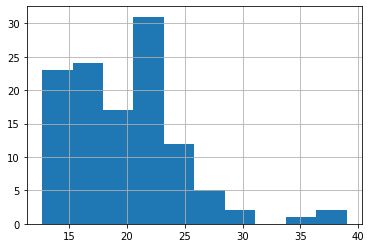

In [70]:
# plot distribution for fe_2008
fe_1999.hist()

In [71]:
# how many observations I have for each sample? (N>30,we we meet normality condition)

fe_2008.count(), fe_1999.count()

(117, 117)

In [72]:
# is the variance same for both sample? Yes

fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [75]:
# # stats Levene test - returns p value. small p-value means unequal variances
# stats.levene(fe_2008, fe_1999)

In [80]:
# calculate t-statistic and p value

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [81]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [33]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

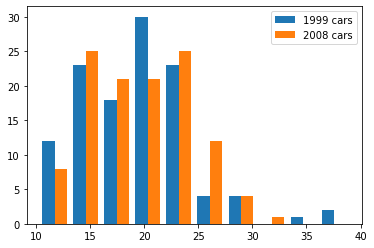

In [34]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

#### 2. Are compact cars more fuel-efficient than the average car?


Comparing fuel economy of one group with population mean  (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency  
$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and  p/2 < 0.05

In [35]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

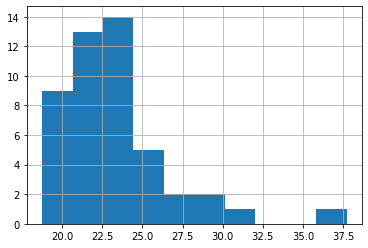

In [36]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

fe_compact.hist()

In [37]:
# calculate t and p values:

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [38]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



#### Do manual cars get better gas mileage than automatic cars?

- One-sample or two-sample t test?
- 1-tailed or 2-tailed?

$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars  
$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [39]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

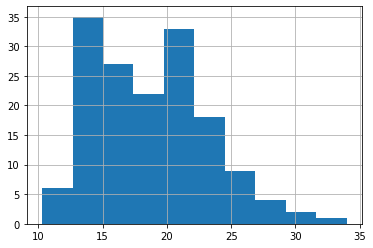

In [40]:
# look at the distribution. N >30

fe_auto.hist()

<AxesSubplot:>

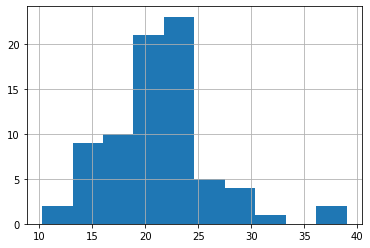

In [41]:
# look at the distribution. N >30

fe_manual.hist()

In [43]:
# look at variances
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [45]:
# # # stats Levene test - returns p value. small p-value means unequal variances
# stats.levene(fe_auto, fe_manual)

In [78]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = False)
t, p/2, alpha

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [13]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [50]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

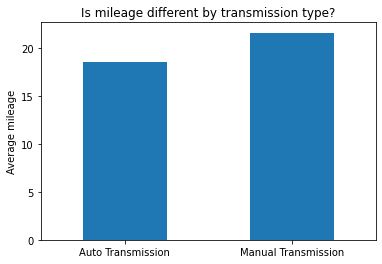

In [51]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')